In [1]:
# We are creating a repository of resources for 3 programs at NEU: MSIS, SES, and CSYE
# To create the repository we start with gatehering details of these programs. 
# To do so we scraped NEU programs page like: https://www.northeastern.edu/graduate/?s=data+analytics&paged=1
# The code below scrapes NEU programs website

In [2]:
# We have used requests and beautifulSoup library to scrape and organise data
# We used pandas to store the scraped information in a dataframe

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import itertools
import re

In [3]:
#An empty list to contain the program list after web scraping
program=[]

base_url='https://www.northeastern.edu/graduate/?s=master&paged={}'

for n in range(1,30):
    scrape_url=base_url.format(n)
    res=requests.get(scrape_url)

    soup=bs(res.text, 'lxml')
    courses=soup.select('.program-title')
    duration=soup.select('.col-3')
    location=soup.select('.col-1')
    
    for loc, year, course in zip(location, duration, courses): 
        course_title=course.select('a')[0] 
        course_duration=list(year.select('nobr'))
        course_location=list(loc.select('h5'))
        
        #appending details to program list
        if len(course_location)==1:
            program.append([course_title.text, course_duration[0].text,course_location[0].text ,course_title['href']])

#storing the data in dataframe using pandas

programdf = pd.DataFrame(program,columns = ["Program Name","Duration",'loc', "Program Link"])

programdf=programdf.drop('loc', axis=1)

programdf.drop_duplicates(subset="Program Name", keep="first", inplace=True)
programdf

,Program Name,Duration,Program Link
0,Cybersecurity,2-3 Years,https://www.northeastern.edu/graduate/program/...
1,Bioengineering,2-2.5 years,https://www.northeastern.edu/graduate/program/...
2,Health Informatics,2 Years,https://www.northeastern.edu/graduate/program/...
3,Civil Engineering,2-3 Years,https://www.northeastern.edu/graduate/program/...
4,Industrial Engineering,18-24 Months,https://www.northeastern.edu/graduate/program/...
...,...,...,...
119,Organizational Leadership/1-Year Experiential,2 years,https://www.northeastern.edu/graduate/program/...
121,Insurance Analytics and Management,2 years,https://www.northeastern.edu/graduate/program/...
122,Applied Machine Intelligence,12-18 Months,https://www.northeastern.edu/graduate/program/...
123,Public Health,12-18 Months,https://www.northeastern.edu/graduate/program/...


In [4]:
#storing data in MYSQL using mysql connector

import mysql.connector
neucourse = mysql.connector.connect(host = 'localhost', user = 'root',passwd = 'Sundaram@123', database = 'dmdd_proj_neu_course')
mycursor = neucourse.cursor()

In [5]:
#insert query for putting data in tables

for i,row in programdf.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.neu_program (program_name,duration,program_url) values(%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [6]:

# scraping https://catalog.northeastern.edu/course-descriptions/****/ for DAMG/INFO/CSYE

In [7]:
#scraping data analytics program page for data

course_catalog=[]
url_damg='https://catalog.northeastern.edu/course-descriptions/damg/'

result_damg=requests.get(url_damg)
soup_catalog_damg=bs(result_damg.text,'lxml')
catalog_damg=soup_catalog_damg.select(".courseblock")

for course in catalog_damg:
    
    course_id=course.select('.courseblocktitle')[0]
    course_description=course.select('.cb_desc')[0]
    
    c_id=re.search(r'\d\d\d\d', course_id.text)
    damg_id='DAMG '+ str(c_id.group())
    damg_name=course_id.text[12:]
    x=re.split("\.  ",damg_name)
        
    course_catalog.append(['Data Analytics Engineering',damg_id, x[0],course_description.text])
    
#scraping information systems program page for data

url_info='https://catalog.northeastern.edu/course-descriptions/info/'

result_info=requests.get(url_info)
soup_catalog_info=bs(result_info.text,'lxml')
catalog_info=soup_catalog_info.select(".courseblock")

for course in catalog_info:
    
    course_id=course.select('.courseblocktitle')[0]
    course_description=course.select('.cb_desc')[0]
    
    c_id=re.search(r'\d\d\d\d', course_id.text)
    info_id='INFO '+ str(c_id.group())
    info_name=course_id.text[12:]
    x=re.split("\.  ",info_name)
        
    course_catalog.append(['Information Systems',info_id, x[0],course_description.text])

#scraping software engineering systems program page for data

url_csye='https://catalog.northeastern.edu/course-descriptions/csye/'

course_catalog_csye=[]

result_csye=requests.get(url_csye)
soup_catalog_csye=bs(result_csye.text,'lxml')
catalog_csye=soup_catalog_csye.select(".courseblock")

for course in catalog_csye:
    
    course_id=course.select('.courseblocktitle')[0]
    
    
    course_description=course.select('.cb_desc')[0]
    
    c_id=re.search(r'\d\d\d\d', course_id.text)
    csye_id='CSYE '+ str(c_id.group())
    csye_name=course_id.text[12:]
    x=re.split("\.  ",csye_name)
    course_catalog.append(['Software Engineering Systems', csye_id, x[0], course_description.text])

In [8]:
#converting scraped data into a dataframe

catalogdf = pd.DataFrame(course_catalog,columns = ["Program_name","Course ID","Course_Name", "Description"])
catalogdf.drop_duplicates(subset="Course ID", keep="first", inplace=True)
catalogdf

,Program_name,Course ID,Course_Name,Description
0,Data Analytics Engineering,DAMG 6105,Data Science Engineering with Python,Studies the Python programming language with d...
1,Data Analytics Engineering,DAMG 6210,Data Management and Database Design,Studies design of information systems from a d...
2,Data Analytics Engineering,DAMG 7105,Intelligent Data Modeling and Presentation for...,Studies every step in a data analysis pipeline...
3,Data Analytics Engineering,DAMG 7245,Big-Data Systems and Intelligence Analytics,Offers students an opportunity to learn a hand...
4,Data Analytics Engineering,DAMG 7250,Big Data Architecture and Governance,Focuses on creating and managing a data-driven...
...,...,...,...,...
75,Software Engineering Systems,CSYE 7550,Distributed Intelligent Agents in the Metaverse,Introduces the field of agent-based computing ...
76,Software Engineering Systems,CSYE 7962,Elective,Offers elective credit for courses taken at ot...
77,Software Engineering Systems,CSYE 7978,Independent Study,Offers theoretical or experimental work under ...
78,Software Engineering Systems,CSYE 7990,Thesis,Offers analytical and/or experimental work con...


In [9]:
#storing data in MYSQL using mysql connector

import mysql.connector
neucourse = mysql.connector.connect(host = 'localhost', user = 'root',passwd = 'Sundaram@123', database = 'dmdd_proj_neu_course')
mycursor = neucourse.cursor()

In [10]:
#insert query for putting data in tables

for i,row in catalogdf.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.neu_course_catalog (program_name,course_id,course_name,course_description) values(%s,%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [11]:
import pandas as pd

In [12]:
#reading course relevant resources data from csv file for storing into tables 

df = pd.read_csv('Resource_material.csv',
                usecols = ['Which software is used for this course? ',
       'Please provide website url for the above software download',
       'Which Professional Certifications are available to master skills for this course?',
       'Which online platform is available  to practice/study the course?'])

df.drop_duplicates(subset="Which software is used for this course? ", keep="first", inplace=True)

In [13]:
df.head()

,Which software is used for this course?,Please provide website url for the above software download,Which Professional Certifications are available to master skills for this course?,Which online platform is available to practice/study the course?
0,Neural Designer,https://neural-designer.en.softonic.com/,Azure AI Engineer Associate: Certificate from...,https://playground.tensorflow.org/#activation=...
1,Python,https://www.python.org/downloads/,Certified Professional in Python Programming 1,https://www.online-python.com/
2,Microsoft Azure,https://azure.microsoft.com/en-us/downloads/,AZ-900 Microsoft Azure Fundamentals,https://www.cloudzero.com/platform
4,Visual studio,https://visualstudio.microsoft.com/,https://www.udemy.com/course/c-sharp-visual-st...,Udemy
5,Apache Hadoop,https://spark.apache.org/downloads.html,Data Analytics certificate,https://powerbi.microsoft.com/en-us/


In [14]:
#establishing MYSQL conection using mysql connector

import mysql.connector
neucourse = mysql.connector.connect(host = 'localhost', user = 'root',passwd = 'Sundaram@123', database = 'dmdd_proj_neu_course')
mycursor = neucourse.cursor()

In [15]:
#insert query for putting data in tables

for i,row in df.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.neu_resource_materials(software_name,software_download_url,professional_certification,online_platform) values (%s,%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [16]:
#reading course relevant resources data from csv file for storing into tables 

df_course_resource = pd.read_csv('Resource_material.csv',
                usecols = ['Please select the course id for above course.',
                           'Which software is used for this course? ','Course Rating '])

df_course_resource

,Please select the course id for above course.,Which software is used for this course?,Course Rating
0,INFO 6106,Neural Designer,4
1,DAMG 6105,Python,3
2,CSYE 6225,Microsoft Azure,5
3,INFO 5002,Python,3
4,INFO 6205,Visual studio,4
5,DAMG 7245,Apache Hadoop,4
6,CSYE 6230,Ubuntu,2
7,DAMG 7275,SQL Developer,4
8,DAMG 7370,Tableau,5
9,CSYE 6220,Spring MVC,4


In [17]:
import matplotlib.pyplot as plt

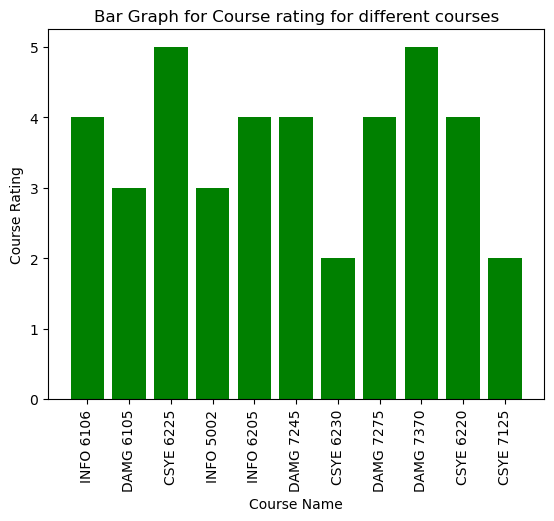

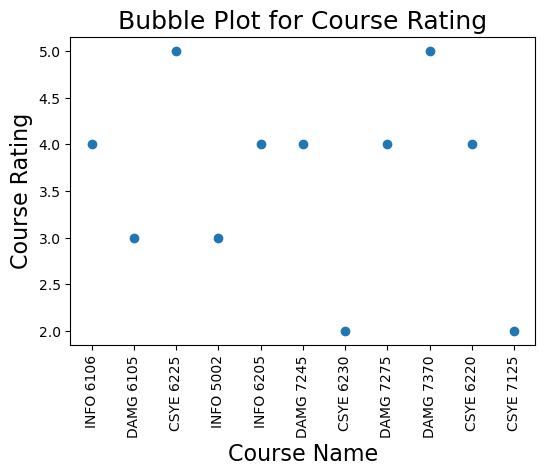

In [18]:
# Bar Graph for visualizing acquired data 

plt.bar("Please select the course id for above course.", "Course Rating ", data = df_course_resource, color = "green")
plt.xlabel("Course Name")
plt.ylabel("Course Rating")
plt.title("Bar Graph for Course rating for different courses")
plt.xticks(rotation = 'vertical')
plt.show()

# Bubble plot for visualizing acquired data

plt.figure(figsize=(6, 4))
plt.scatter('Please select the course id for above course.', 'Course Rating ', data = df_course_resource)
plt.xlabel("Course Name", size=16)
plt.ylabel("Course Rating", size=16)
plt.title("Bubble Plot for Course Rating", size=18)
plt.xticks(rotation = 'vertical')
plt.show()


In [19]:
#insert query for putting data in tables

for i,row in df_course_resource.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.neu_course_resource(course_id,software_name,course_rating) values (%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [20]:
# Reading faculty details from Google response sheet

In [21]:
course_faculty = pd.read_csv('Faculty_response_form.csv',
                usecols = ['COURSE ID',
                          'PROFESSOR NAME'])

In [22]:
course_faculty.head ()

,COURSE ID,PROFESSOR NAME
0,DAMG 7350,Nick Beauchamp
1,INFO 6105,Nik Bear Brown
2,CSYE 6305,Prof. Hossein Noorian
3,DAMG 7275,Sagar Kamarthi
4,DAMG 7290,Muhammad Noor E Alam


In [23]:
#insert query for putting data in table

for i,row in course_faculty.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.NEU_Course_Faculty (course_id,faculty_name) values(%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [ ]:
# Reading faculty ratings from Google response sheet

In [24]:
faculty = pd.read_csv('Faculty_response_form.csv',
                usecols = ['PROFESSOR NAME','RATING'])

faculty.drop_duplicates(subset="PROFESSOR NAME", keep="first", inplace=True)

In [25]:
faculty.head ()

,PROFESSOR NAME,RATING
0,Nick Beauchamp,4
1,Nik Bear Brown,5
2,Prof. Hossein Noorian,3
3,Sagar Kamarthi,4
4,Muhammad Noor E Alam,3


In [26]:
import matplotlib.pyplot as plt

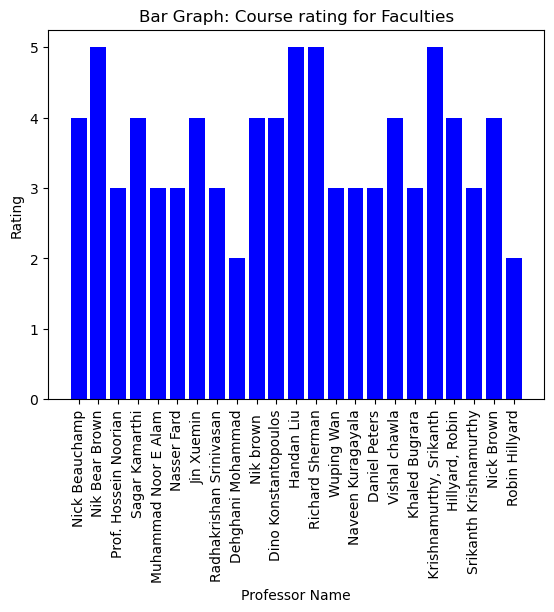

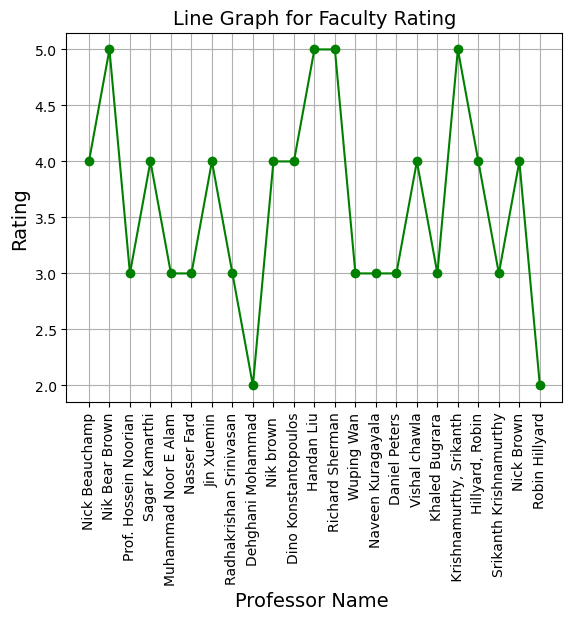

In [27]:
# Bar graph for visualizing professor ratings data

plt.bar("PROFESSOR NAME", "RATING", data = faculty, color = "blue")
plt.xlabel("Professor Name")
plt.ylabel("Rating")
plt.title("Bar Graph: Course rating for Faculties")
plt.xticks(rotation = 'vertical')
plt.show()

# Line Graph for visualizing professor ratings data

plt.plot(faculty['PROFESSOR NAME'], faculty['RATING'], color='green', marker='o')
plt.xlabel('Professor Name ', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Line Graph for Faculty Rating', fontsize=14)
plt.grid(True)
plt.xticks(rotation = 'vertical')
plt.show()

In [28]:
#insert query for putting faculty data in table

for i,row in faculty.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.NEU_Facultys (faculty_name,faculty_rating) values(%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [29]:
# Scrape data for finding core_course_requirements for MSIS, SES, and CSYE. 

In [30]:
# importing the libraries
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd


urls=['https://catalog.northeastern.edu/graduate/engineering/multidisciplinary/information-systems-msis/#programrequirementstext','https://catalog.northeastern.edu/graduate/engineering/multidisciplinary/software-engineering-systems-ms/#programrequirementstext','https://catalog.northeastern.edu/graduate/engineering/mechanical-industrial/data-analytics-engineering-ms/#programrequirementstext']

program_name = {'https://catalog.northeastern.edu/graduate/engineering/multidisciplinary/information-systems-msis/#programrequirementstext': 'Information Systems', 'https://catalog.northeastern.edu/graduate/engineering/multidisciplinary/software-engineering-systems-ms/#programrequirementstext': 'Software Engineering Systems', 'https://catalog.northeastern.edu/graduate/engineering/mechanical-industrial/data-analytics-engineering-ms/#programrequirementstext': 'Data Analytics Engineering'}

tableValues=[]

for url in urls:
    core_course=[]
    result=requests.get(url)
    soup=bs(result.text,'html.parser')
    core_course_catalog=soup.select(".sc_courselist")


    myTable = soup.find('table',{'class':"sc_courselist"})

    row_headers = []
    for x in myTable.find_all('tr'):
        for y in x.find_all('th'):
            row_headers.append(y.text)


    for x in myTable.find_all('tr')[1:]:
        td_tags = x.find_all('td')
        td_val = [program_name[url]]+[y.text for y in td_tags]
        tableValues.append(td_val)
        

a=['Information Systems', 'INFO\xa05100', 'Application Engineering', '4'] 
b=['Information Systems', 'INFO\xa05101', 'Lab for INFO 5100', '4'] 
tableValues.append(a)
tableValues.append(b)

#storing core course requirements data in dataframe

df=pd.DataFrame(tableValues,columns=['Program Name','Course ID','Course Name','Credit Hours'])

df=df.drop('Credit Hours', axis=1)
new_df = df.iloc[1::]
new_df

,Program Name,Course ID,Course Name
1,Software Engineering Systems,CSYE 6200,Concepts of Object-Oriented Design
2,Software Engineering Systems,INFO 6205,Program Structure and Algorithms
3,Data Analytics Engineering,IE 5374,Special Topics in Industrial Engineering
4,Data Analytics Engineering,IE 6600,Computation and Visualization for Analytics
5,Data Analytics Engineering,IE 6700,Data Management for Analytics
6,Data Analytics Engineering,or DAMG 6210,Data Management and Database Design
7,Data Analytics Engineering,IE 7275,Data Mining in Engineering
8,Data Analytics Engineering,IE 7280,Statistical Methods in Engineering
9,Data Analytics Engineering,OR 6205,Deterministic Operations Research
10,Information Systems,INFO 5100,Application Engineering


In [31]:
import mysql.connector
neucourse = mysql.connector.connect(host = 'localhost', user = 'root',passwd = 'Sundaram@123', database = 'dmdd_proj_neu_course')
mycursor = neucourse.cursor()

In [32]:
#insert query for putting core course requirements data in table

for i,row in new_df.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.course_core_requirement (program_name,course_id,course_name) values (%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [34]:
# To get jobs related data for MSIS, SES, and CSYE, we scraped linkedin API.
# We used scrapy for this and stored the data in json files. 
# We inserted this data in the jobs table in our database. 

In [35]:
df_SES = pd.DataFrame(pd.read_json("C:\\Users\\utkar\\OneDrive\\Desktop\\SEM 1\\Java\\Java_Assignments\\linkedinbot\\linkedinbot\\spiders\\data\\linkedinSpider_2022-12-03T22-03-06.json"))
df_IS = pd.DataFrame(pd.read_json("C:\\Users\\utkar\\OneDrive\\Desktop\\SEM 1\\Java\\Java_Assignments\\linkedinbot\\linkedinbot\\spiders\\data\\linkedinSpider_2022-12-03T22-07-03.json"))
df_DAE = pd.DataFrame(pd.read_json("C:\\Users\\utkar\\OneDrive\\Desktop\\SEM 1\\Java\\Java_Assignments\\linkedinbot\\linkedinbot\\spiders\\data\\linkedinSpider_2022-12-03T22-10-03.json"))
df=pd.concat([df_SES, df_IS, df_DAE])
df=df.drop('programName', axis=1)

df

,title,jobId,companyName,location,datePosted,link,description,seniorityLevel,employmentType,jobFunction,industry
0,"Associate, Content Analytics & Operations",3356615002,Netflix,"Los Angeles, CA",2022-11-16,https://www.linkedin.com/jobs/view/associate-c...,Netflix is the world's leading streaming enter...,Not Applicable,Full-time,Management and Manufacturing,"Movies, Videos, and Sound, Technology, Informa..."
1,"Principal Analyst, Data Science & Analytics",3311157304,Zillow,United States,2022-11-23,https://www.linkedin.com/jobs/view/principal-a...,About The Team The Zillow Analytics organizati...,Mid-Senior level,Full-time,Engineering and Science,Software Development
2,"VP, Data Analytics",3339080809,TechInsights,"Denver, CO",2022-11-01,https://www.linkedin.com/jobs/view/vp-data-ana...,OUR STORY TechInsights is the world’s most tru...,Director,Full-time,Business Development and Sales,Internet Publishing
3,Vice President – Data Science & Analytics,3219049068,H&R Block,United States,2022-11-28,https://www.linkedin.com/jobs/view/vice-presid...,What You'll Do... H&R Block is seeking a Vice ...,Executive,Full-time,Research,Financial Services and Retail
4,"VP, Data Analytics",3343511133,Propio Language Services,"Overland Park, KS",2022-11-08,https://www.linkedin.com/jobs/view/vp-data-ana...,At Propio Language Services we are closing t...,Executive,Full-time,Business Development and Sales,Translation and Localization
...,...,...,...,...,...,...,...,...,...,...,...
45,"Vice President, System Operations and Infrastr...",3379639408,Raintree Systems,United States,2022-11-29,https://www.linkedin.com/jobs/view/vice-presid...,As VP of Systems Operations & Infrastructure f...,Director,Full-time,Information Technology,Internet Publishing
46,Information Technology Engineer,3385840807,Outsource IT Solutions,"Naperville, IL",None,https://www.linkedin.com/jobs/view/information...,We are looking for a dedicated and dynamic ind...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting
47,Software Dev Engineering Intern,3385766806,Yahoo,United States,None,https://www.linkedin.com/jobs/view/software-de...,It takes powerful technology to connect our br...,Internship,Full-time,Engineering and Information Technology,Advertising Services
48,Systems Developer,3385236440,Ralco,"Marshall, MN",2022-11-08,https://www.linkedin.com/jobs/view/systems-dev...,Company Overview Ralco is a science and techno...,Mid-Senior level,Full-time,Engineering and Information Technology,Internet Publishing


In [36]:
#insert query for jobs data into jobs table

for i,row in df.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.job_info (title,job_id,company_name,location,date_posted,link,description,seniority_level,employment_type,job_function,industry) values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted


In [37]:
df_SES = pd.DataFrame(pd.read_json("C:\\Users\\utkar\\OneDrive\\Desktop\\SEM 1\\Java\\Java_Assignments\\linkedinbot\\linkedinbot\\spiders\\data\\linkedinSpider_2022-12-03T22-03-06.json"))
df_IS = pd.DataFrame(pd.read_json("C:\\Users\\utkar\\OneDrive\\Desktop\\SEM 1\\Java\\Java_Assignments\\linkedinbot\\linkedinbot\\spiders\\data\\linkedinSpider_2022-12-03T22-07-03.json"))
df_DAE = pd.DataFrame(pd.read_json("C:\\Users\\utkar\\OneDrive\\Desktop\\SEM 1\\Java\\Java_Assignments\\linkedinbot\\linkedinbot\\spiders\\data\\linkedinSpider_2022-12-03T22-10-03.json"))
df=pd.concat([df_SES, df_IS, df_DAE])
data = df[['programName','jobId']]
data



,programName,jobId
0,Data Analytics Engineering,3356615002
1,Data Analytics Engineering,3311157304
2,Data Analytics Engineering,3339080809
3,Data Analytics Engineering,3219049068
4,Data Analytics Engineering,3343511133
...,...,...
45,Software Engineering Systems,3379639408
46,Software Engineering Systems,3385840807
47,Software Engineering Systems,3385766806
48,Software Engineering Systems,3385236440


In [38]:
for i,row in data.iterrows():
    sql = "INSERT INTO dmdd_proj_neu_course.program_jobs (program_name,job_id) values (%s,%s)"
    mycursor.execute(sql,tuple(row))
    neucourse.commit()
print("Records inserted")

Records inserted
